In [68]:
import os

%matplotlib inline
import string
from collections import deque

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("database.csv")

In [3]:
data.head()

,Report Number,Supplemental Number,Accident Year,Accident Date/Time,Operator ID,Operator Name,Pipeline/Facility Name,Pipeline Location,Pipeline Type,Liquid Type,...,Other Fatalities,Public Fatalities,All Fatalities,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,20100016,17305,2010,1/1/2010 7:15 AM,32109,ONEOK NGL PIPELINE LP,KINDER MORGAN JCT,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,110.0,1517.0,0.0,0.0,0.0,0.0,1627
1,20100254,17331,2010,1/4/2010 8:30 AM,15786,PORTLAND PIPELINE CORP,24-INCH MAIN LINE,ONSHORE,ABOVEGROUND,CRUDE OIL,...,NaN,NaN,NaN,4000.0,8.0,0.0,0.0,0.0,0.0,4008
2,20100038,17747,2010,1/5/2010 10:30 AM,20160,"PETROLOGISTICS OLEFINS, LLC",NaN,ONSHORE,ABOVEGROUND,"HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS",...,NaN,NaN,NaN,0.0,200.0,0.0,0.0,0.0,0.0,200
3,20100260,18574,2010,1/6/2010 7:30 PM,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",SUPERIOR TERMINAL,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,200.0,40.0,0.0,11300.0,0.0,0.0,11540
4,20100030,16276,2010,1/7/2010 1:00 PM,300,"PLAINS PIPELINE, L.P.",RED RIVER EAST,ONSHORE,UNDERGROUND,CRUDE OIL,...,NaN,NaN,NaN,20000.0,150.0,0.0,7500.0,2000.0,0.0,29650


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 48 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Report Number                         2795 non-null   int64  
 1   Supplemental Number                   2795 non-null   int64  
 2   Accident Year                         2795 non-null   int64  
 3   Accident Date/Time                    2795 non-null   object 
 4   Operator ID                           2795 non-null   int64  
 5   Operator Name                         2795 non-null   object 
 6   Pipeline/Facility Name                2674 non-null   object 
 7   Pipeline Location                     2795 non-null   object 
 8   Pipeline Type                         2777 non-null   object 
 9   Liquid Type                           2795 non-null   object 
 10  Liquid Subtype                        1349 non-null   object 
 11  Liquid Name      

In [5]:
data['Pipeline Type'].value_counts()

ABOVEGROUND        1475
UNDERGROUND         985
TANK                301
TRANSITION AREA      16
Name: Pipeline Type, dtype: int64

In [43]:
data['Pipeline Location'].value_counts()

ONSHORE     2777
OFFSHORE      18
Name: Pipeline Location, dtype: int64

In [45]:
data['Cause Subcategory'].value_counts()

INTERNAL                                             362
PUMP OR PUMP-RELATED EQUIPMENT                       296
NON-THREADED CONNECTION FAILURE                      286
EXTERNAL                                             230
OTHER EQUIPMENT FAILURE                              204
MALFUNCTION OF CONTROL/RELIEF EQUIPMENT              171
THREADED CONNECTION/COUPLING FAILURE                 151
CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED    112
OTHER INCORRECT OPERATION                             86
INCORRECT VALVE POSITION                              84
MISCELLANEOUS                                         76
INCORRECT INSTALLATION                                72
MANUFACTURING-RELATED                                 70
OVERFILL/OVERFLOW OF TANK/VESSEL/SUMP                 69
FAILURE OF EQUIPMENT BODY                             67
DEFECTIVE OR LOOSE TUBING/FITTING                     62
THIRD PARTY EXCAVATION DAMAGE                         57
TEMPERATURE                    

In [9]:
data['Accident Latitude'].min()

18.44801

In [11]:
data['Cause Category'].value_counts()

MATERIAL/WELD/EQUIP FAILURE    1435
CORROSION                       592
INCORRECT OPERATION             378
ALL OTHER CAUSES                118
NATURAL FORCE DAMAGE            118
EXCAVATION DAMAGE                97
OTHER OUTSIDE FORCE DAMAGE       57
Name: Cause Category, dtype: int64

In [13]:
data['Liquid Ignition'].value_counts()

NO     2700
YES      95
Name: Liquid Ignition, dtype: int64

In [14]:
data['Liquid Explosion'].value_counts()

NO     2780
YES      15
Name: Liquid Explosion, dtype: int64

In [22]:
data['Accident Year'].value_counts()

2015    462
2014    454
2016    415
2013    401
2012    366
2010    350
2011    345
2017      2
Name: Accident Year, dtype: int64

<AxesSubplot:xlabel='Accident Year', ylabel='count'>

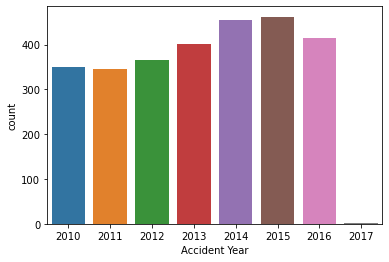

In [25]:
sns.countplot(x = 'Accident Year', data = data)

<AxesSubplot:xlabel='count', ylabel='Cause Category'>

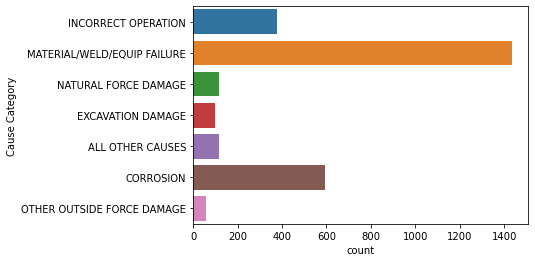

In [35]:
sns.countplot(y = 'Cause Category', data = data)
# cause_plot.set_xticklabels(cause_plot.get_xticklabels(), rotation=90)

From the above plot, Material/Equipment failure is the most frequent cause of pipeline incidents and corrosion follows next. Let's investigate CORROSION first and check how the properties of crude oil contribute to corrosion.

In [38]:
corrosion_incidents = data.query('`Cause Category` == "CORROSION"')

In [44]:
corrosion_incidents['Cause Subcategory'].value_counts()

INTERNAL    362
EXTERNAL    230
Name: Cause Subcategory, dtype: int64

From this data, we can infer that, internal corrosion has been a major contributor to pipeline incidents that occured due to corrosion. 

In [40]:
corrosion_incidents['Pipeline Type'].value_counts()

UNDERGROUND        427
ABOVEGROUND        110
TANK                42
TRANSITION AREA      7
Name: Pipeline Type, dtype: int64

In the entire dataset, the number of incidents with ABOVEGROUND pipes are higher. But while specifically looking at incidents due to corrosion, we can see that UNDERGROUND pipes are more prone to corrosion.

In [47]:
corrosion_incidents.groupby(['Cause Subcategory', 'Pipeline Type']).size()

Cause Subcategory  Pipeline Type  
EXTERNAL           ABOVEGROUND         26
                   TANK                14
                   TRANSITION AREA      3
                   UNDERGROUND        182
INTERNAL           ABOVEGROUND         84
                   TANK                28
                   TRANSITION AREA      4
                   UNDERGROUND        245
dtype: int64

From the above data, we can see that Internal corrosion in underground pipes are the major contributor to incidents due to corrosion.

In [57]:
corrosion_incidents.groupby(['Liquid Type']).size()

Liquid Type
CO2 (CARBON DIOXIDE)                                    6
CRUDE OIL                                             419
HVL OR OTHER FLAMMABLE OR TOXIC FLUID, GAS             35
REFINED AND/OR PETROLEUM PRODUCT (NON-HVL), LIQUID    132
dtype: int64

Among corrosion, pipelines carrying crude oil are the most prone.

Corrosivity in transmission pipelines comes from two sources – water content and erosive constituents, such as mud and sand. Those substances are removed before crude oil enters pipelines for transmission. Moreover, for transport in transmission pipelines, the sand and water content of oil is strictly controlled and the combined basic sediment and water content must be less than 0.5 per cent by volume.

Crude oil and natural gas can carry various high-impurity products which are inherently corrosive. In the case of oil and gas wells and pipelines, such highly corrosive media are carbon dioxide (CO2), hydrogen sulfide (H2S), and free water. Continual extraction of CO2, H2S, and free water through oil and gas components can over time make the internal surfaces of these components to suffer from corrosion effects. The lines and the component fittings of the lines would undergo material degradations with the varying conditions of the well due to changes in fluid compositions, souring of wells over the period, and changes in operating conditions of the pressures and temperatures. This material degradation results in the loss of mechanical properties like strength, ductility, impact strength, and so on. This leads to loss of materials, reduction in thickness, and at times ultimate failure. A point will be reached where the component may completely break down and the assembly will need to be replaced while production is stopped.

Apart from that, CO2 is added to enhance oil production in some cases.

Difference in corrosion levels due to aboveground and underground 

# Expploring physical/chemical that cause material/welding/equipment failure

In [64]:
failure_incidents = data.query('`Cause Category` == "MATERIAL/WELD/EQUIP FAILURE"')

In [65]:
failure_incidents['Cause Subcategory'].value_counts()

PUMP OR PUMP-RELATED EQUIPMENT                       296
NON-THREADED CONNECTION FAILURE                      286
OTHER EQUIPMENT FAILURE                              204
MALFUNCTION OF CONTROL/RELIEF EQUIPMENT              171
THREADED CONNECTION/COUPLING FAILURE                 151
CONSTRUCTION, INSTALLATION OR FABRICATION-RELATED    112
MANUFACTURING-RELATED                                 70
FAILURE OF EQUIPMENT BODY                             67
DEFECTIVE OR LOOSE TUBING/FITTING                     62
ENVIRONMENTAL CRACKING-RELATED                        16
Name: Cause Subcategory, dtype: int64

In [67]:
failure_incidents['Pipeline Type'].value_counts()

ABOVEGROUND        951
UNDERGROUND        324
TANK               151
TRANSITION AREA      4
Name: Pipeline Type, dtype: int64

While the failure of pump and related equipment seems to be the ajor contributor, upon further exploration, we can find that the major reason for pump related failure is corrosion.

Heavy oil contains higher percentage of sulphur and carbon compounds. These compounds lead to faster corrosion.

In [69]:
pipeline_lengths = pd.DataFrame({'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016], 'Pipeline_length': [1554377, 1563638,1567477,1575707,1585809, 1594501, 1603982]})

In [70]:
pipeline_lengths

,year,Pipeline_length
0,2010,1554377
1,2011,1563638
2,2012,1567477
3,2013,1575707
4,2014,1585809
5,2015,1594501
6,2016,1603982


In [75]:
year_counts = pd.DataFrame(data.groupby('Accident Year').size())
year_counts

,0
Accident Year,
2010,350
2011,345
2012,366
2013,401
2014,454
2015,462
2016,415
2017,2


In [79]:
# plt.plot(pipeline_lengths['year'], pipeline_lengths['Pipeline_length'])
# plt.plot(year_counts.index, year_counts[0])


In [80]:
data['Liquid Name'].value_counts()

PROPANE                               26
ETHANE                                24
Y-GRADE                               23
ETHYLENE                              17
PROPYLENE                             15
                                      ..
TYPE OF PRODUCT WAS NOT IDENTIFIED     1
VINYL ACETATE MONOMER                  1
FULL RANGE NAPTHA                      1
ULTRA LOW SULFUR DIESEL                1
Y-GRADE (RAW FEED)                     1
Name: Liquid Name, Length: 69, dtype: int64

In [81]:
[1, 2, 3] + [5]

[1, 2, 3, 5]

In [84]:
odd = lambda x : bool(x%2)
numbers = [n for n in range(10)]
for i in range(len(numbers)):
    print(i)
    if odd(numbers[i]):
        del numbers[i]


0
1
2
3
4
5
6


IndexError: list index out of range

In [ ]:
def add_names_to_list(names):
    
    if not names:
        raise ValueError("No values passed to the function")
        
    if not all(isinstance(name, str) for name in names):
        raise TypeError("The name is not a string")
        
    name_list = []
    for name in names:
        name_list.append(name)
    return name_list

In [ ]:
class testAddNamesToList(unittest.TestCase):
    
    def test_add_names_to_list(self):
        sample_list = add_names_to_list(['Aish', 'Vinay'])
        self.assertEqual(sample_list, ['Aish', 'Vinay'], "Did not obtain expected result")
        
    def test_input_values_list(self):
        with raises(ValueError):
            add_names_to_list([])
            
    def test_each_input_value(self):
        with raises(TypeError):
            add_names_to_list(['Aish', 2])
    
    